##IMPORTING lIBRARIES ##


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load data and Data Preprocessing##

In [2]:
Data = pd.read_csv("/content/drive/MyDrive/ionosphere.data")

# displays first 5 rows
print(Data.head())

#convert to numpy
df = Data.to_numpy()

Input_data = df[:,:-1]
Output_data = df[:,-1]

del Data, df



   1  0  0.99539  -0.05889  0.85243  0.02306  0.83398  -0.37708      1.1  \
0  1  0  1.00000  -0.18829  0.93035 -0.36156 -0.10868  -0.93597  1.00000   
1  1  0  1.00000  -0.03365  1.00000  0.00485  1.00000  -0.12062  0.88965   
2  1  0  1.00000  -0.45161  1.00000  1.00000  0.71216  -1.00000  0.00000   
3  1  0  1.00000  -0.02401  0.94140  0.06531  0.92106  -0.23255  0.77152   
4  1  0  0.02337  -0.00592 -0.09924 -0.11949 -0.00763  -0.11824  0.14706   

   0.03760  ...  -0.51171  0.41078  -0.46168  0.21266  -0.34090  0.42267  \
0 -0.04549  ...  -0.26569 -0.20468  -0.18401 -0.19040  -0.11593 -0.16626   
1  0.01198  ...  -0.40220  0.58984  -0.22145  0.43100  -0.17365  0.60436   
2  0.00000  ...   0.90695  0.51613   1.00000  1.00000  -0.20099  0.25682   
3 -0.16399  ...  -0.65158  0.13290  -0.53206  0.02431  -0.62197 -0.05707   
4  0.06637  ...  -0.01535 -0.03240   0.09223 -0.07859   0.00732  0.00000   

   -0.54487  0.18641  -0.45300  g  
0  -0.06288 -0.13738  -0.02447  b  
1  -0.24180  0

In [3]:
print(f"The dim of the input : {Input_data.shape}")
print(f"the data input : {Input_data[:10]} ")

print("-----------------------------------------------------------------------------")

print(f"The dim of the output : {Output_data.shape}")
print(f"the data output : {Output_data[:10]} ")


The dim of the input : (350, 34)
the data input : [[1 0 1.0 -0.18829 0.93035 -0.36156 -0.10868 -0.93597 1.0 -0.04549
  0.50874 -0.67743 0.34432 -0.69707 -0.51685 -0.97515 0.05499 -0.62237
  0.33109 -1.0 -0.13151 -0.453 -0.18056 -0.35734 -0.20332 -0.26569
  -0.20468 -0.18401 -0.1904 -0.11593 -0.16626 -0.06288 -0.13738 -0.02447]
 [1 0 1.0 -0.03365 1.0 0.00485 1.0 -0.12062 0.88965 0.01198 0.73082
  0.05346 0.85443 0.00827 0.54591 0.00299 0.83775 -0.13644 0.75535
  -0.0854 0.70887 -0.27502 0.43385 -0.12062 0.57528 -0.4022 0.58984
  -0.22145 0.431 -0.17365 0.60436 -0.2418 0.56045 -0.38238]
 [1 0 1.0 -0.45161 1.0 1.0 0.71216 -1.0 0.0 0.0 0.0 0.0 0.0 0.0 -1.0
  0.14516 0.54094 -0.3933 -1.0 -0.54467 -0.69975 1.0 0.0 0.0 1.0 0.90695
  0.51613 1.0 1.0 -0.20099 0.25682 1.0 -0.32382 1.0]
 [1 0 1.0 -0.02401 0.9414 0.06531 0.92106 -0.23255 0.77152 -0.16399
  0.52798 -0.20275 0.56409 -0.00712 0.34395 -0.27457 0.5294 -0.2178
  0.45107 -0.17813 0.05982 -0.35575 0.02309 -0.52879 0.03286 -0.65158
  0.132

In [4]:
# create one hot vector of the target output
def one_hot_encode(data):
    unique_values = np.unique(data)  # Get the unique values in the data
    num_classes = len(unique_values)  # Number of unique classes
    
    # Initialize an empty array with the appropriate shape
    one_hot = np.zeros((len(data), num_classes), dtype=int)
    
    for i, value in enumerate(data):
        class_index = np.where(unique_values == value)[0][0]  # Find the index of the class
        one_hot[i, class_index] = 1  # Set the corresponding element to 1
    
    return one_hot
  
Output_data = one_hot_encode(Output_data)
print(Output_data[:5])


[[1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]]


## Define The architecture of the NN ##

In [5]:
input_dim = Input_data.shape[1]   # Dimension of the input features
hidden_dim = 30                #number of the neurons in the hidden layer
output_dim = Output_data.shape[1] # Dimensin of the output

In [6]:
#Initialize the weights and biases
Weights_ih = np.random.randn( hidden_dim ,input_dim )  # weight matrix for the input to the hidden
Weights_ho = np.random.randn( output_dim,hidden_dim)  # weight matrix for the hdden to output

In [7]:
#Initialize the Biases
bias_h = np.random.randn(hidden_dim)   # Biases for hidden layer
bias_o = np.random.randn(output_dim)   #Biases for the output layer

In [8]:
print(f"The dim of the Input_layers : {input_dim}")
print(f"The dim of the Output_layesr : {output_dim}")


print(f"The dim of the Weights_ih : { Weights_ih.shape}")
print(f"The dim of the Weights_ho : { Weights_ho.shape}")
print(f"The dim of the bias_h : { bias_h.shape}")
print(f"The dim of the bias_o : { bias_o.shape}")

The dim of the Input_layers : 34
The dim of the Output_layesr : 2
The dim of the Weights_ih : (30, 34)
The dim of the Weights_ho : (2, 30)
The dim of the bias_h : (30,)
The dim of the bias_o : (2,)


In [9]:
print(f"the Weights_ih : { Weights_ih}")
print("------------------------------------------------------------------------------------------------")
print(f"the Weights_ho : { Weights_ho}")
print("------------------------------------------------------------------------------------------------")
print(f"the bias_h : { bias_h}")
print("------------------------------------------------------------------------------------------------")
print(f"the bias_o : { bias_o}")

the Weights_ih : [[ 0.55763984 -0.4620385  -0.69435389 ... -1.0799333   0.23045167
   0.63274699]
 [ 0.72282999  0.26260595 -1.00439426 ...  0.46214929  0.59962638
   0.18325802]
 [ 0.62610893  0.14230372 -1.05417307 ... -0.26158648 -1.80325372
   0.84805773]
 ...
 [-0.96626876  0.98496451  0.73131964 ... -1.46178076  1.27743513
  -0.11845133]
 [ 0.24007868 -0.78864696  1.71689109 ... -0.35292941  1.33737155
   0.98701146]
 [ 1.85776051 -1.56601635  0.48221545 ...  0.84463501 -1.28230832
  -0.79800807]]
------------------------------------------------------------------------------------------------
the Weights_ho : [[-7.71471944e-01 -3.79166455e-01  1.83888312e+00  1.02682224e+00
  -4.22672369e-01 -4.17419534e-01  4.74936439e-01  1.26389773e+00
  -8.65903405e-01 -1.85718617e-03 -6.02962988e-03  4.81846473e-01
   3.36804775e-01 -8.91883605e-01  7.10046006e-01 -8.22818387e-01
   5.74722991e-01  1.28177793e+00  5.53461513e-01  3.89452227e-01
  -7.28514653e-01  9.61712441e-01  1.92444675e+

## Split Data##

In [10]:
def split_data(data,size ):

  index = int(data.shape[0] * size)

  train_data = data[:index]
  test_data = data[index:]

  return train_data, test_data

#split the train dataset 
X_train, X_val = split_data(Input_data,0.7)

#split the test dataset
y_train, y_val = split_data(Output_data,0.7)

print(f"the dim of the X_train: {X_train.shape}")
print(f"the dim of the X Test: {X_val.shape}")

print(f"the dim of the y train : {y_train.shape}")
print(f"the dim of the y test: {y_val.shape}")

the dim of the X_train: (244, 34)
the dim of the X Test: (106, 34)
the dim of the y train : (244, 2)
the dim of the y test: (106, 2)


## Standarization and Normalization

In [11]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

print(f"scaled train input dim:{X_train.shape}")
print(f"scaled test input dim:{X_val.shape}")



#without built-in function
#input_data = (X_train - np.mean(X_train))/np.std(X_train)

scaled train input dim:(244, 34)
scaled test input dim:(106, 34)


## Training the model

### FeedForWard Algo


In [12]:
# Activation functions

def sigmoid(x):

  """Sigmoid activation Function"""
  return 1/(1 + np.exp(-x))

In [13]:
def single_layer_feedforward(input,Weight,b) :
  Z = np.dot(input,Weight.T)+b
  A = sigmoid(Z)
 
  return Z , A



In [14]:

#perform the feedward pass for each input

def fordward_propagation(X_train, Weights_ih, bias_h, Weights_ho, bias_o):

  j = 0   # counter , number of features
  t=0  #counter
  Z_ih = np.zeros((X_train.shape[0],hidden_dim))  # hold result Z= W1*X1 +W2*X2 for both neurons
  A_ih = np.zeros((X_train.shape[0],hidden_dim))  # hold the result of the activation function for both neurons
  
  Z_ho = np.zeros((Z_ih.shape[0],len(Weights_ho)))  # hold result Z= W1*X1 +W2*X2 for both neurons
  A_ho = np.zeros((Z_ih.shape[0],len(Weights_ho)))  # hold the result of the activation function for both neurons

  # iteration input- hidden layers
  for input_sample in X_train:
    for i in range(len(Weights_ih)):
      z , a =single_layer_feedforward(input_sample,Weights_ih[i],bias_h[i])
      Z_ih[j,i]=z
      A_ih[j,i]= a 
    j+=1
  #------------------------------------------------------------------------
  # iteration hidden - output layers
  for act in A_ih:
      z,a = single_layer_feedforward(act,Weights_ho,bias_o)
      Z_ho[t] = z
      A_ho[t] = a
      t+=1
  

  return Z_ih,A_ih, Z_ho, A_ho 


In [15]:
#Z_ih,A_ih, Z_ho, A_ho =  fordward_propagation(X_train, Weights_ih, bias_h, Weights_ho, bias_o)

### Get the lost Function

In [16]:
# classifiction problems , will be use the binary crossentropy

def cross_entropy_loss(y_true, y_pred):
  epsilon= 1e-10  # which is a small positive value, it ensures that the logarithm is always applied to a non-zero and positive number
  
  loss = -np.mean(y_true * np.log(y_pred + epsilon) + (1- y_true) * np.log(1-y_pred + epsilon))
  
  return loss



### Backprop Algo

In [17]:
# implement the back propagation algorithm

def back_propagation(X_train,y_train,A_ho,A_ih, Weights_ho, bias_o, Weights_ih, bias_h , learning_rate):

  dZ_ho = A_ho - y_train
  dW_ho = np.dot(dZ_ho.T, A_ih)/X_train.shape[0]
  db_ho = np.mean(dZ_ho , axis = 0)

  dZ_ih = np.dot(dZ_ho, Weights_ho) * A_ih * (1-A_ih)
  dW_ih = np.dot( dZ_ih.T, X_train) / X_train.shape[0]
  db_ih = np.mean(dZ_ih, axis=0)

  Weights_ih -= learning_rate * dW_ih
  bias_h -= learning_rate * db_ih
  Weights_ho -= learning_rate* dW_ho
  bias_o -= learning_rate * db_ho

  return Weights_ih, bias_h , Weights_ho , bias_o





## Full Algorithm

In [18]:
# Define the main function for training
max_epoch = 1000
learning_rate = 0.1
train_losses = []
val_losses = []
def full_feedforward(X_train, y_train, X_val, y_val, Weights_ih, bias_h, Weights_ho, bias_o):

  for epoch in range(max_epoch):
    # Forward propagation on training data
    Z_ih, A_ih, Z_ho, A_ho = fordward_propagation(X_train, Weights_ih, bias_h, Weights_ho, bias_o)
    train_loss = cross_entropy_loss(y_train, A_ho)
    train_losses.append(train_loss)

    # Backpropagation and weight updates
    Weights_ih, bias_h, Weights_ho, bias_o = back_propagation(X_train, y_train, A_ho, A_ih, Weights_ho, bias_o, Weights_ih, bias_h, learning_rate)

    # Forward propagation on validation data
    _, _, _, A_ho_val = fordward_propagation(X_val, Weights_ih, bias_h, Weights_ho, bias_o)
    val_loss = cross_entropy_loss(y_val, A_ho_val)
    val_losses.append(val_loss)
    print(f"Epoch {epoch+1}/{max_epoch} - Train Loss: {train_loss:.4f} - Val Loss: {val_loss:.4f}")
  


In [19]:
full_feedforward(X_train, y_train, X_val, y_val,Weights_ih, bias_h, Weights_ho, bias_o)

Epoch 1/1000 - Train Loss: 1.5861 - Val Loss: 2.7818
Epoch 2/1000 - Train Loss: 1.4345 - Val Loss: 2.4917
Epoch 3/1000 - Train Loss: 1.3038 - Val Loss: 2.2392
Epoch 4/1000 - Train Loss: 1.1937 - Val Loss: 2.0231
Epoch 5/1000 - Train Loss: 1.1025 - Val Loss: 1.8401
Epoch 6/1000 - Train Loss: 1.0279 - Val Loss: 1.6859
Epoch 7/1000 - Train Loss: 0.9669 - Val Loss: 1.5561
Epoch 8/1000 - Train Loss: 0.9171 - Val Loss: 1.4464
Epoch 9/1000 - Train Loss: 0.8760 - Val Loss: 1.3534
Epoch 10/1000 - Train Loss: 0.8420 - Val Loss: 1.2742
Epoch 11/1000 - Train Loss: 0.8134 - Val Loss: 1.2063
Epoch 12/1000 - Train Loss: 0.7892 - Val Loss: 1.1477
Epoch 13/1000 - Train Loss: 0.7683 - Val Loss: 1.0970
Epoch 14/1000 - Train Loss: 0.7501 - Val Loss: 1.0528
Epoch 15/1000 - Train Loss: 0.7341 - Val Loss: 1.0141
Epoch 16/1000 - Train Loss: 0.7198 - Val Loss: 0.9800
Epoch 17/1000 - Train Loss: 0.7069 - Val Loss: 0.9498
Epoch 18/1000 - Train Loss: 0.6951 - Val Loss: 0.9230
Epoch 19/1000 - Train Loss: 0.6843 - 

## Ploting the grapgh

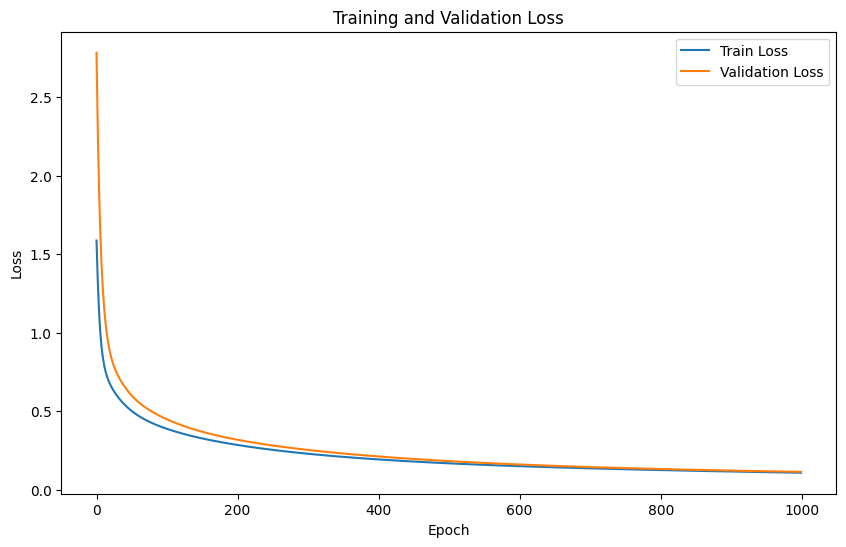

In [20]:
   # Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

 Train Accuracy : 0.9754098360655737
Validation Accuracy :  0.9622641509433962


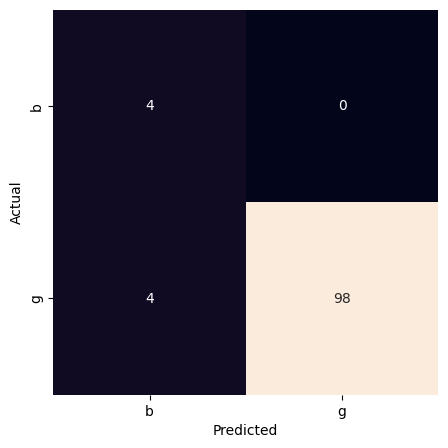

Validation Metrics : 
Accuracy : 0.9622641509433962
F1 score: 0.98
Recall :  0.9607843137254902
Precision :  1.0


In [21]:
from sklearn.metrics import accuracy_score,f1_score, recall_score, precision_score,confusion_matrix,multilabel_confusion_matrix
import seaborn as sns # confusion mat colour

def evaluate_model(X,y, W_ih, b_h, W_oh,b_o):
  _, _, _, pred = fordward_propagation(X,W_ih,b_h,W_oh,b_o)
  y_pred = np.argmax(pred,axis=1)
  y_true = np.argmax(y,axis = 1)
  acc = accuracy_score(y_true, y_pred)

  return acc,y_pred


#Evaluate the model on the validation data
train_acc , train_pred = evaluate_model(X_train, y_train,Weights_ih, bias_h, Weights_ho,bias_o)
print(" Train Accuracy :",train_acc)

#Evaluate the model on the train data
val_acc, val_pred = evaluate_model(X_val, y_val, Weights_ih, bias_h, Weights_ho, bias_o)
print("Validation Accuracy : ", val_acc)


#Create a confusion matrix fot he validation prediction
confusion_mat = confusion_matrix(np.argmax(y_val,axis =1 ),val_pred)
class_label=["b","g"]

plt.subplots(figsize=(5, 5))
sns.heatmap(confusion_mat, square=True, 
            annot=True, fmt='d', cbar=False,                    
            xticklabels=class_label,                               
            yticklabels=class_label)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)


#Compute evaluation metrics
val_acc = accuracy_score(np.argmax(y_val,axis =1 ),val_pred)
val_f1 = f1_score(np.argmax(y_val, axis = 1),val_pred, average ='binary')
val_recall = recall_score(np.argmax(y_val,axis =1),val_pred, average ='binary')
val_precision = precision_score(np.argmax(y_val,axis=1),val_pred, average = 'binary')


print("Validation Metrics : ")
print("Accuracy :" , val_acc)
print("F1 score:", val_f1)
print("Recall : ", val_recall)
print("Precision : " , val_precision)

